# Logistic Regression.

The logistic regression is used to model the probability of a certain class or event existing. This can be extended to model several classes of events. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lc_data = pd.read_csv("loan_clean.csv")
lc_data.drop('Unnamed: 0', inplace=True, axis=1)

In [9]:
lc_data

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
0,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,1.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
1,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,0.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
2,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,0.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
3,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,2.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
4,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,0.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406070,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,0.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
406071,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,0.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
406072,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,1.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
406073,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,0.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [3]:
y = lc_data['loan_status']
X = lc_data.drop('loan_status', axis=1)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
logisticRegr = LogisticRegression()

In [8]:
%%time

logisticRegr.fit(x_train, y_train)

CPU times: user 8.7 s, sys: 99.3 ms, total: 8.8 s
Wall time: 2.33 s


/Users/ikeraguirreotaegui/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred = logisticRegr.predict(x_test)

Accuracy train:  0.8731858837126834
Accuracy test: 0.872092908716595


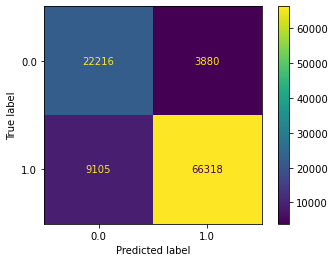

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
plot_confusion_matrix(logisticRegr, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, logisticRegr.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

The accuracy in both the train and the test sets has been pretty similar. It looks like there is no severe overfitting or underfitting, which is good news.
Only 9105 of fully paid loans (12%) have misplaced, while the 14% of defaults have been identified as paid loans.

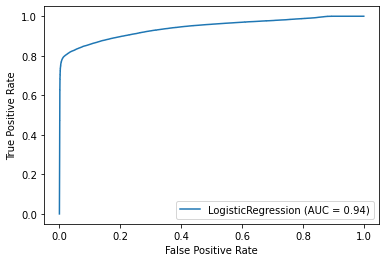

In [12]:
metrics.plot_roc_curve(logisticRegr, x_test, y_test)
plt.show() 

In [ ]:
import pickle

def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
save_models('logisticRegr.sav', logisticRegr)